## DP1 negative source fitlering

Eric Bellm, 2025-04-02

In [34]:
import lsst.afw.display
import numpy as np
import matplotlib.pyplot as plt
display1 = lsst.afw.display.Display(backend='firefly', frame=1)

In [3]:
import lsst.daf.butler

In [4]:
collection_w13 = 'LSSTComCam/runs/DRP/DP1/w_2025_13/DM-49751'

butler_w13 = lsst.daf.butler.Butler("/repo/main", collections=collection_w13)

random u-band visit:
2024110900195

In [5]:
# u band detector id
dataId = {'instrument': 'LSSTComCam', 'detector': 4, 'visit': 2024110900195}

In [6]:
display2 = lsst.afw.display.Display(backend='firefly', frame=2)

In [11]:
difference_w13 = butler_w13.get('difference_image', dataId) 
diaSrc_w13_unfiltered = butler_w13.get('dia_source_unfiltered', dataId)
diaSrc_w13= butler_w13.get('dia_source_detector', dataId)
len(diaSrc_w13)

45

In [36]:
not_sky = ~diaSrc_w13_unfiltered['sky_source']
science_snr_unfiltered = (diaSrc_w13_unfiltered['ip_diffim_forced_PsfFlux_instFlux']/
diaSrc_w13_unfiltered['ip_diffim_forced_PsfFlux_instFluxErr'])
science_snr = diaSrc_w13['scienceFlux']/diaSrc_w13['scienceFluxErr']

In [39]:
        trail_mask = (diaSrc_w13_unfiltered["ext_trailedSources_Naive_length"]
                      >= (36000/3600.0/24.0*30.))
        trail_mask |= diaSrc_w13_unfiltered['ext_trailedSources_Naive_flag_off_image']
        trail_mask |= (diaSrc_w13_unfiltered['ext_trailedSources_Naive_flag_suspect_long_trail']
                       & diaSrc_w13_unfiltered['ext_trailedSources_Naive_flag_edge'])

In [40]:
np.sum(trail_mask)

np.int64(57)

Text(0, 0.5, 'Number of DIASources')

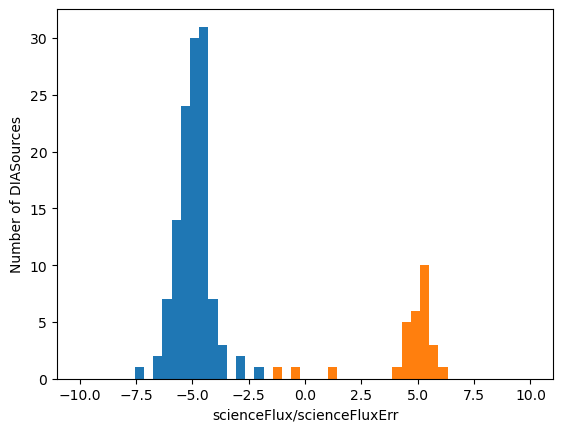

In [41]:
plt.figure()
plt.hist(science_snr_unfiltered[not_sky & ~trail_mask],bins=np.linspace(-10,10,50))
plt.hist(science_snr,bins=np.linspace(-10,10,50))
plt.xlabel('scienceFlux/scienceFluxErr')
plt.ylabel('Number of DIASources')

In [22]:
diaSrc_w13_unfiltered.columns

In [17]:
display2.image(difference_w13)
display2.centroids(diaSrc_w13_unfiltered, size=10, ctype='blue')
for idx,row in diaSrc_w13.iterrows():
    display2.dot('o',row['x'], row['y'], size=10, ctype='red')